# Poster figures

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Importations
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import DataLoader, BatchSampler, random_split
from itertools import chain

from src.covid_cytof_dataset import CovidCytofDataset
from src.models.configurable_nn import ConfigurableNeuralNetwork
from src.models.simple_nn import SimpleNeuralNetwork
from src.trainer import Trainer

sns.set_theme()

In [3]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
# device = "cpu"
print(f"Using {device} device")

Using cuda device


In [4]:
NUM_CELLS_PER_PATIENTS = 10000
BATCH_SIZE = 100
data = CovidCytofDataset("./data/attachments/COVID_CYTOF_BASIC_METADATA_STATUS_AGE_GROUP_SEX.xlsx", "./data",
                         NUM_CELLS_PER_PATIENTS)
train_data, test_data = random_split(data, [0.8, 0.2])

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

/home/evann/.cache/pypoetry/virtualenvs/covid-cytof-NoJZp_V7-py3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Loading fcs data:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:23<00:00,  4.28it/s]


done


## Reg linéaire
### Sans rien

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [06:40<00:00,  8.00s/it, Loss=0.1777, Accuracy=74%, F1=0.4244]


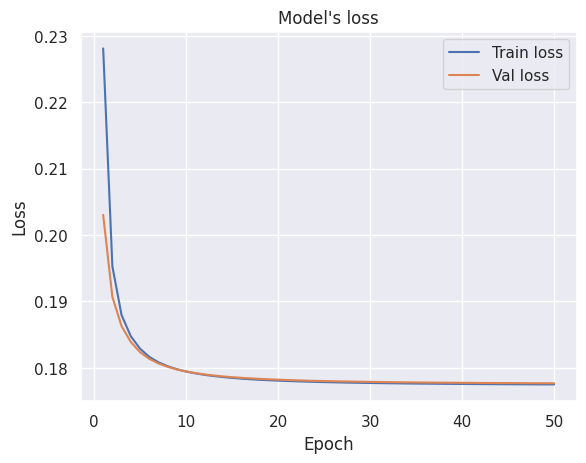

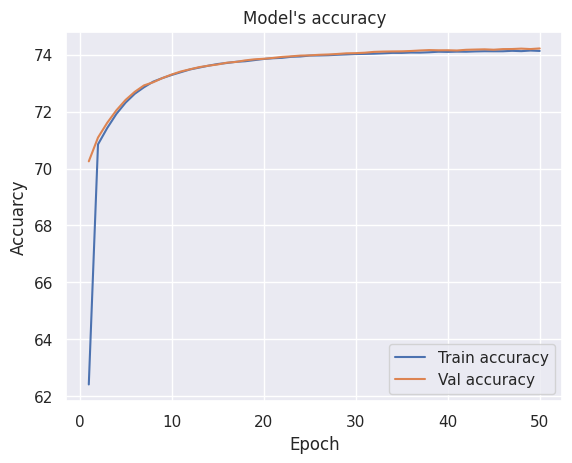

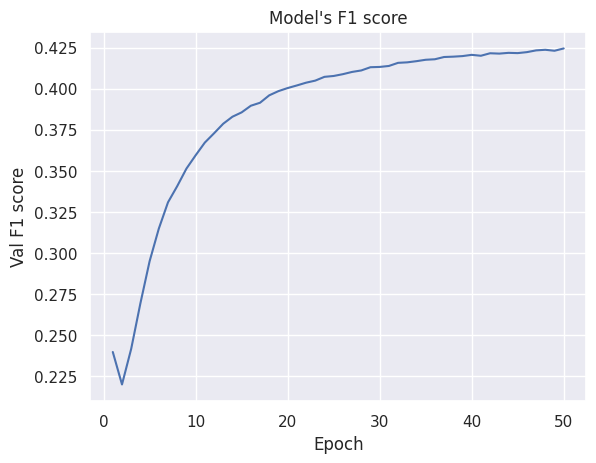

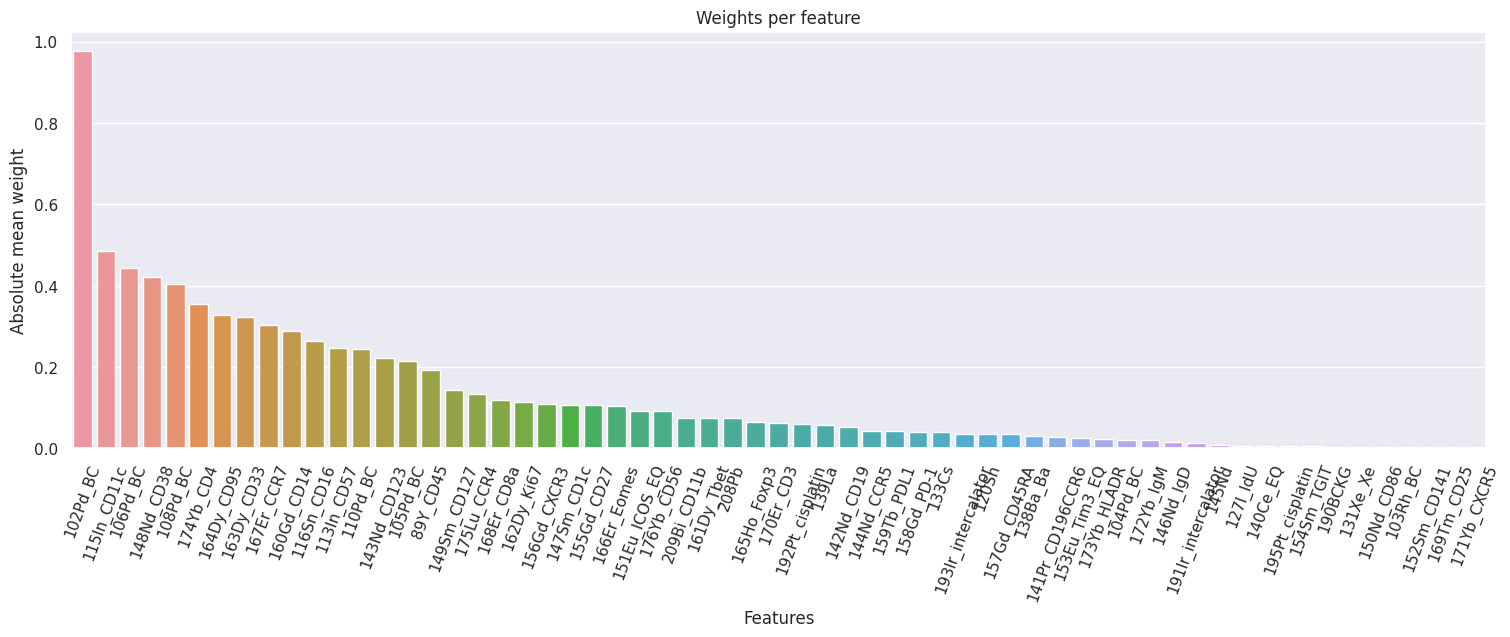

In [5]:
model1 = ConfigurableNeuralNetwork([
    data.data.shape[1],
    1
]).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=1e-3)

trainer = Trainer(model1, optimizer, loss_fn, device, epochs=50, silent=True)

trainer.run(train_dataloader, test_dataloader)

trainer.plot_loss()
trainer.plot_accuracy()
trainer.plot_f1()

model1.plot_weights(features=list(data.columns))

## Reg linéaire
### L1

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [06:38<00:00,  7.97s/it, Loss=0.1776, Accuracy=74%, F1=0.4228]


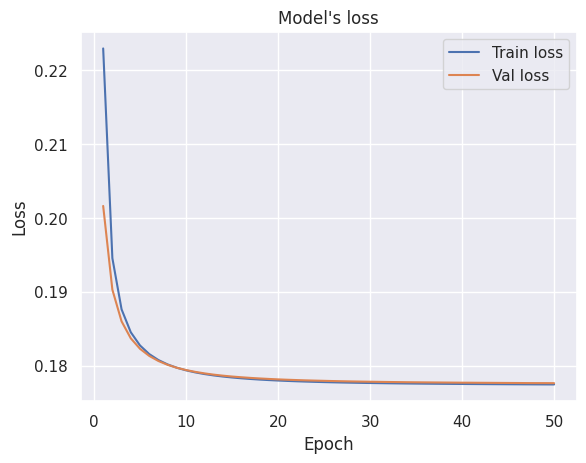

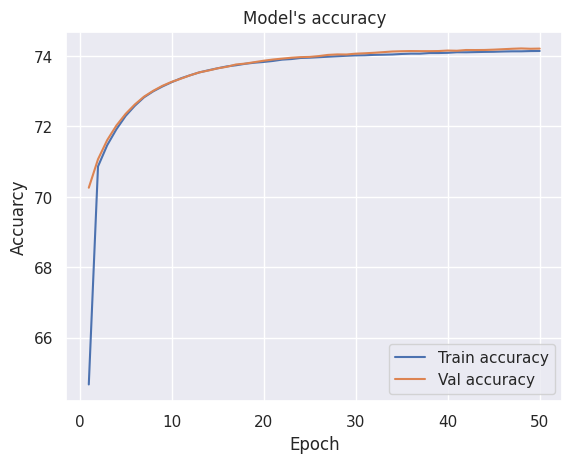

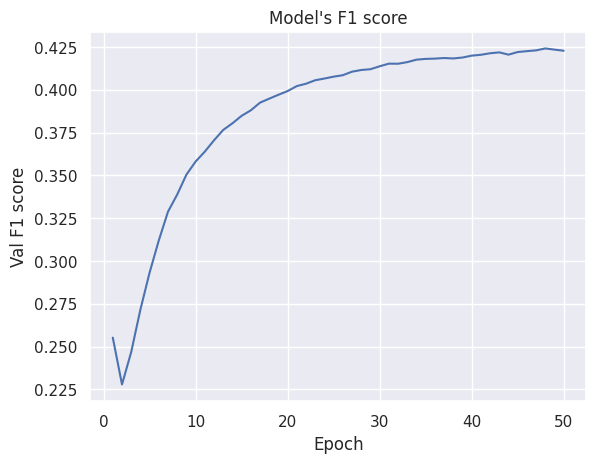

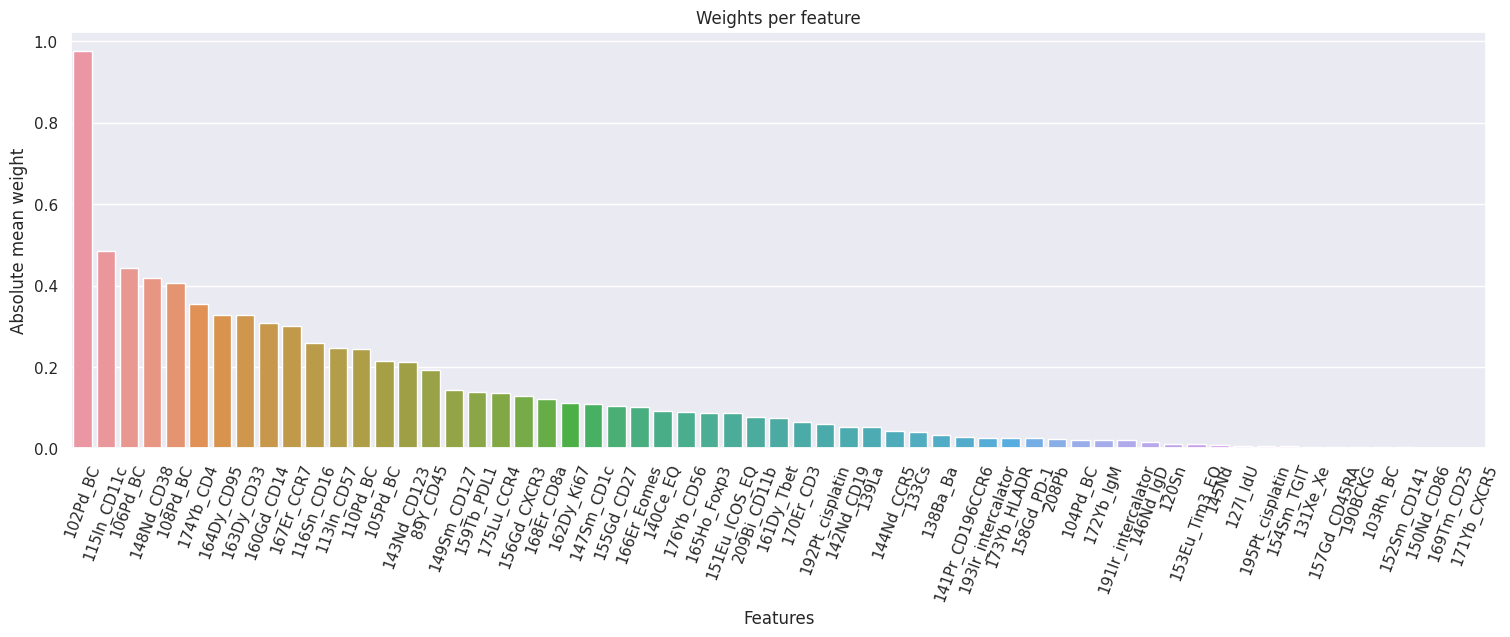

In [6]:
model1 = ConfigurableNeuralNetwork([
    data.data.shape[1],
    1
]).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=1e-3)

trainer = Trainer(model1, optimizer, loss_fn, device, epochs=50, silent=True)

trainer.run(train_dataloader, test_dataloader)

trainer.plot_loss()
trainer.plot_accuracy()
trainer.plot_f1()

model1.plot_weights(features=list(data.columns))

## Résaux deep
### Rien

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [07:25<00:00,  8.90s/it, Loss=0.1403, Accuracy=80%, F1=0.6191]


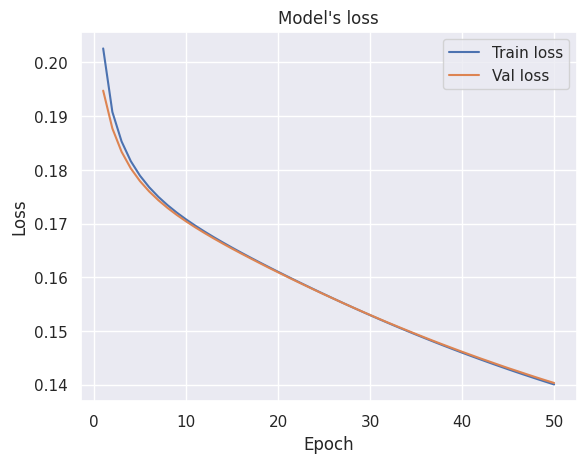

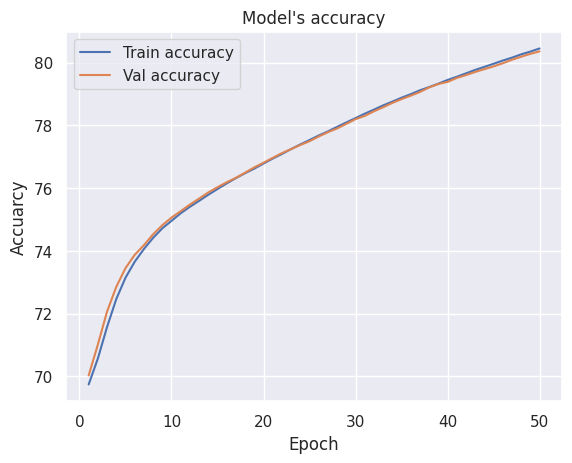

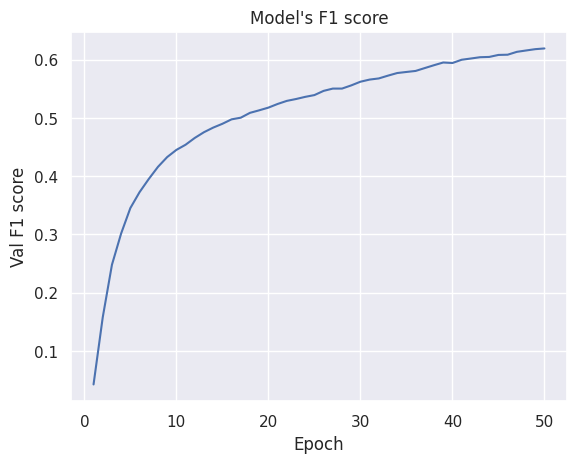

In [7]:
model2 = ConfigurableNeuralNetwork([
    data.data.shape[1],
    500,
    1
]).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-3)

trainer = Trainer(model2, optimizer, loss_fn, device, epochs=50, L1_regularization=False, silent=True)

trainer.run(train_dataloader, test_dataloader)

trainer.plot_loss()
trainer.plot_accuracy()
trainer.plot_f1()

### Dropout

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [07:58<00:00,  9.56s/it, Loss=0.1442, Accuracy=80%, F1=0.6019]


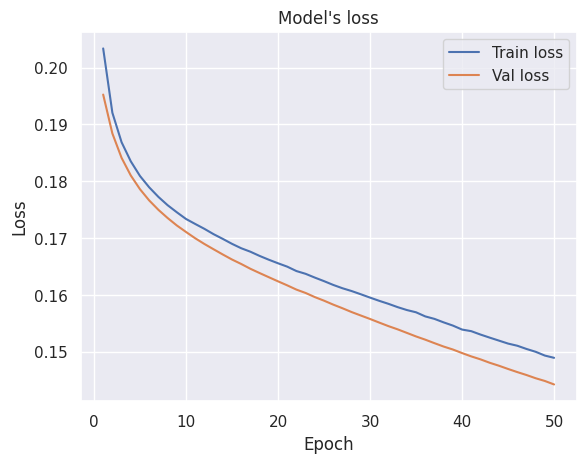

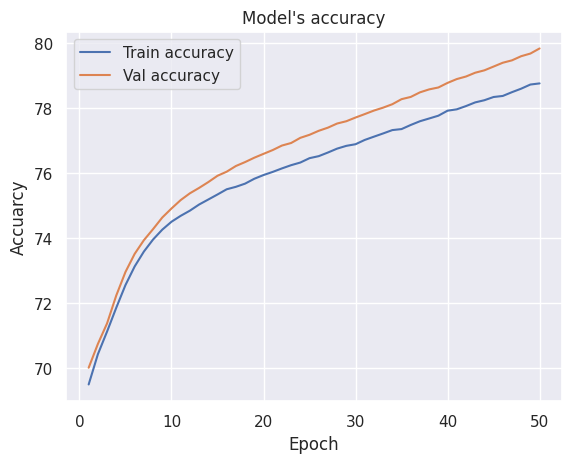

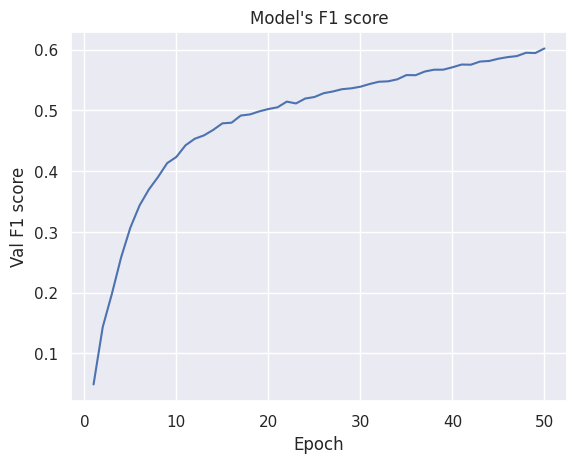

In [8]:
model2 = ConfigurableNeuralNetwork([
    data.data.shape[1],
    500,
    1
], dropout=0.25, dropout_indexs=[1]).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-3)

trainer = Trainer(model2, optimizer, loss_fn, device, epochs=50, L1_regularization=False, silent=True)

trainer.run(train_dataloader, test_dataloader)

trainer.plot_loss()
trainer.plot_accuracy()
trainer.plot_f1()

### L1

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [08:50<00:00, 10.62s/it, Loss=0.1718, Accuracy=75%, F1=0.4350]


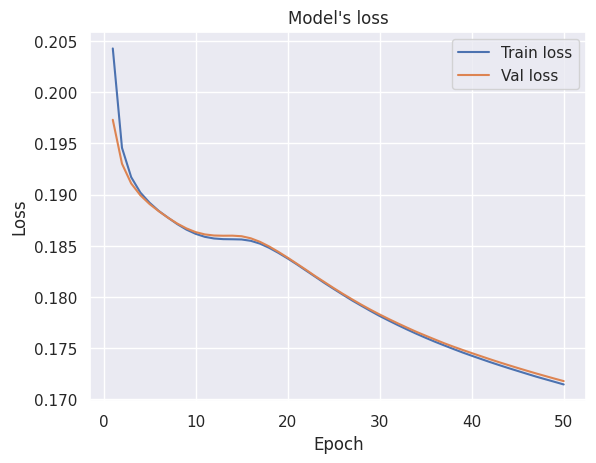

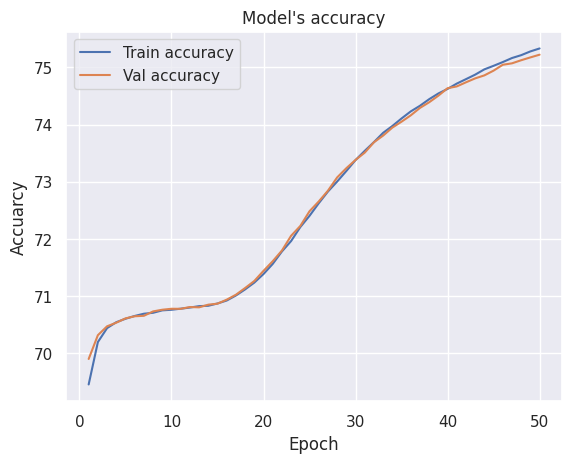

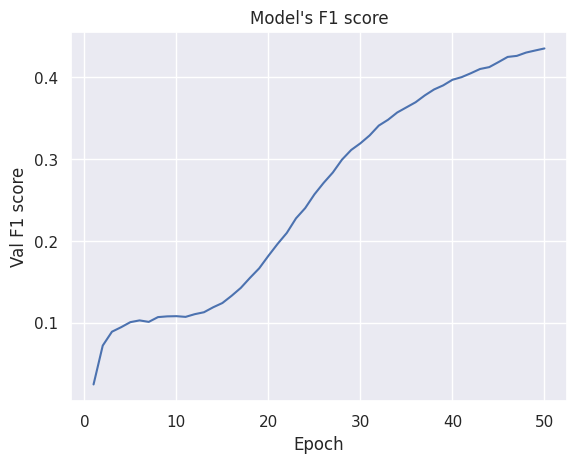

In [9]:
model2 = ConfigurableNeuralNetwork([
    data.data.shape[1],
    500,
    1
]).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-3)

trainer = Trainer(model2, optimizer, loss_fn, device, epochs=50, L1_regularization=True, silent=True)

trainer.run(train_dataloader, test_dataloader)

trainer.plot_loss()
trainer.plot_accuracy()
trainer.plot_f1()

### L1 & Dropout

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [09:04<00:00, 10.88s/it, Loss=0.1751, Accuracy=74%, F1=0.3613]


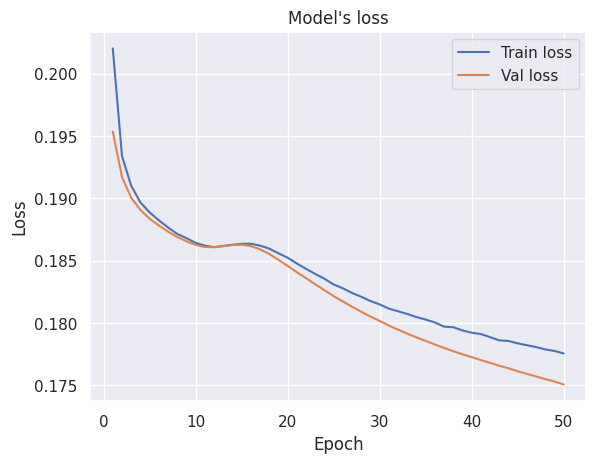

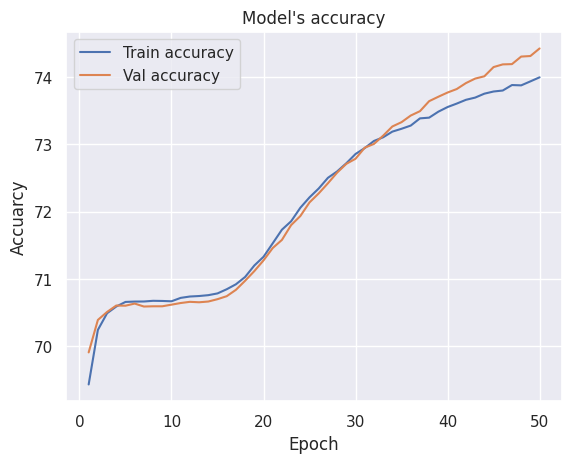

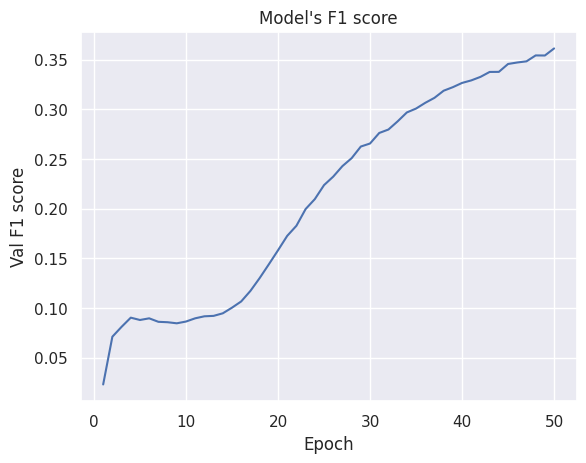

In [10]:
model2 = ConfigurableNeuralNetwork([
    data.data.shape[1],
    500,
    1
], dropout=0.25, dropout_indexs=[1]).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-3)

trainer = Trainer(model2, optimizer, loss_fn, device, epochs=50, L1_regularization=True, silent=True)

trainer.run(train_dataloader, test_dataloader)

trainer.plot_loss()
trainer.plot_accuracy()
trainer.plot_f1()